In [53]:
#importing dependencies
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#splitting the data
(x_train_full,y_train_full),(x_test,y_test)=data.load_data()
x_validate,x_train=x_train_full[:5000]/255,x_train_full[5000:]/255
x_test=x_test/255
Y_validat,y_train=y_train_full[:5000],y_train_full[5000:]


In [61]:
#creating lables 
label=[str(x) for x in range(0,10)]
print (len(label))

10


In [38]:
#creating the model 
from tensorflow import keras
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [44]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_validate,Y_validat),batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0975 - accuracy: 0.9727 - val_loss: 0.1025 - val_accuracy: 0.9704
Epoch 2/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.0902 - accuracy: 0.9747 - val_loss: 0.0999 - val_accuracy: 0.9712
Epoch 3/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.0840 - accuracy: 0.9763 - val_loss: 0.0994 - val_accuracy: 0.9722
Epoch 4/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.0784 - accuracy: 0.9781 - val_loss: 0.0921 - val_accuracy: 0.9738
Epoch 5/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.0726 - accuracy: 0.9802 - val_loss: 0.0868 - val_accuracy: 0.9750
Epoch 6/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.0678 - accuracy: 0.9815 - val_loss: 0.0851 - val_accuracy: 0.9758
Epoch 7/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.0634 - accuracy: 0.9823 - val_loss: 0.0809 -

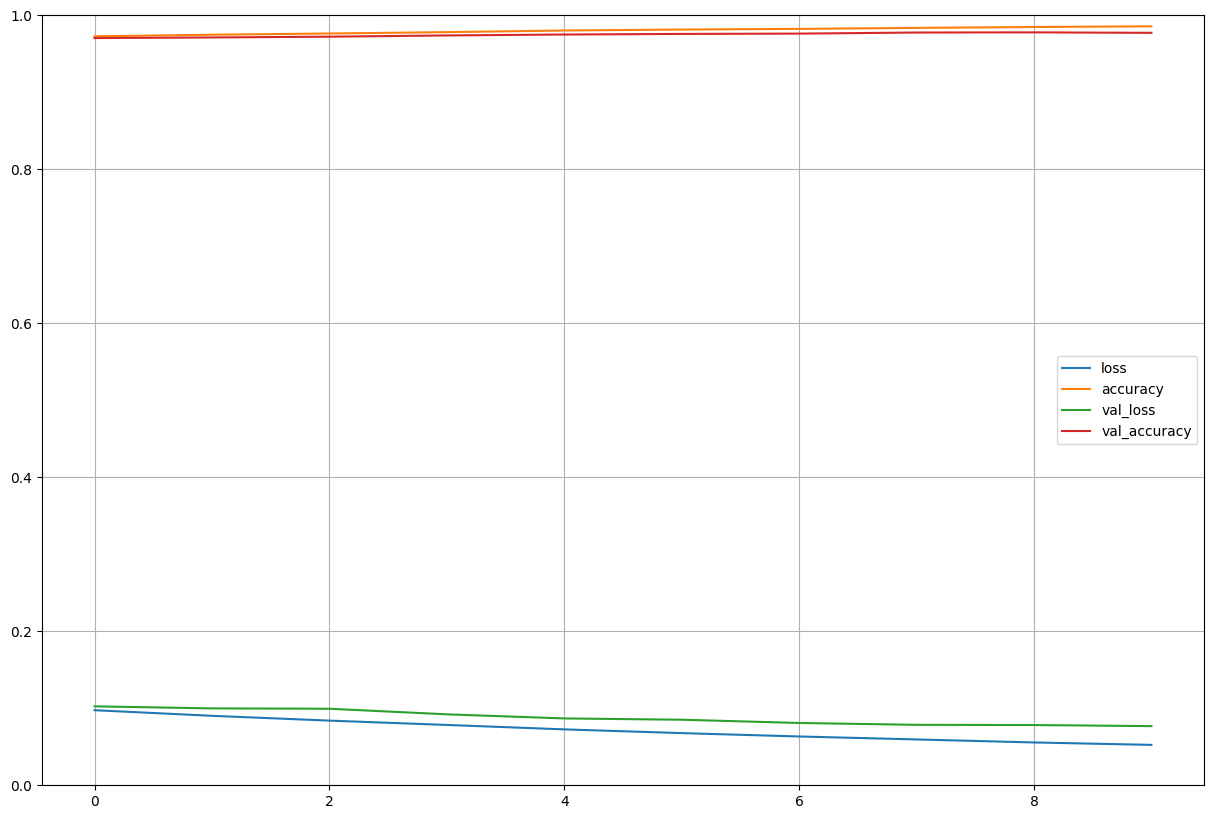

In [47]:
#plotting the accuracy and loss
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()                                   

In [48]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0783 - accuracy: 0.9759


[0.07828269898891449, 0.9758999943733215]

In [50]:
#predicting the values
y_predict=model.predict(x_test)
output=y_predict.argmax(axis=-1)
print(output)

313/313 [==============================] - 2s 6ms/step
[7 2 1 ... 4 5 6]


In [51]:
confussin=tf.math.confusion_matrix(y_test,output)
confussin

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    1,    1,    4,    1,    1,    1,    0],
       [   0, 1124,    2,    1,    0,    1,    4,    1,    2,    0],
       [   8,    3, 1003,    2,    1,    0,    3,    8,    4,    0],
       [   2,    0,    2,  988,    0,    6,    0,    5,    4,    3],
       [   3,    0,    3,    0,  953,    0,    5,    2,    1,   15],
       [   3,    1,    0,    5,    1,  873,    5,    1,    1,    2],
       [   7,    3,    0,    0,    3,    7,  936,    0,    2,    0],
       [   2,    9,    8,    0,    0,    0,    0, 1001,    2,    6],
       [   4,    1,    3,    4,    4,    4,    7,    4,  939,    4],
       [   5,    3,    1,    6,    9,    2,    1,    8,    2,  972]])>

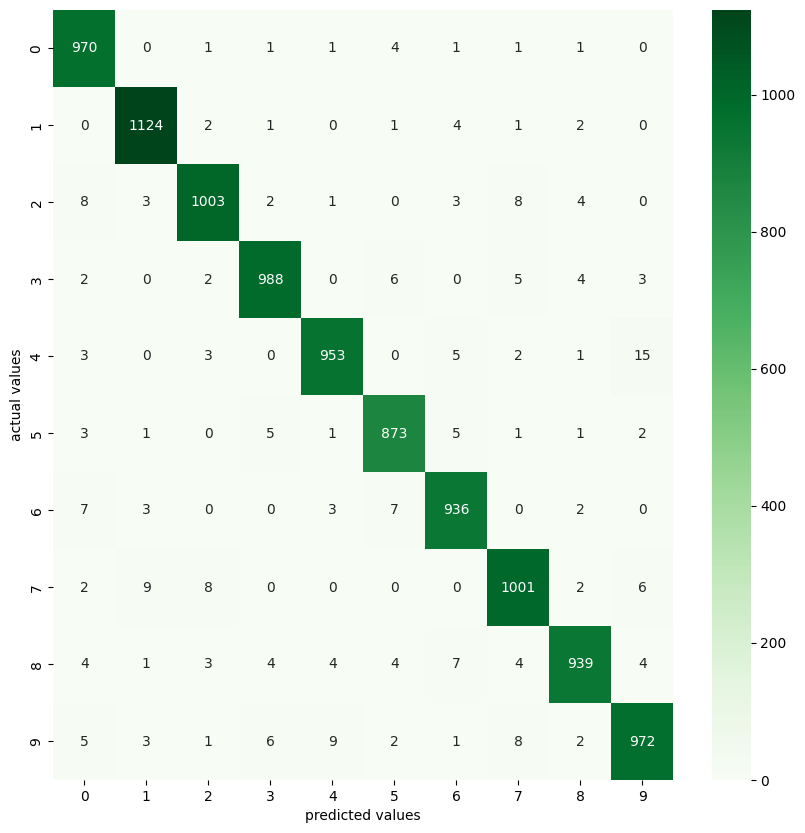

In [64]:
#plotting
#!pip install seaborn
fig=sns.heatmap(confussin,annot=True,fmt='g',cmap="Greens")
fig.set_xlabel("predicted values")
fig.set_ylabel("actual values")
fig.xaxis.set_ticklabels(label)
fig.yaxis.set_ticklabels(label)
fig.figure.set_size_inches(10,10)
plt.show()